참고 : 
* https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb
* https://archive.is/fY0FO

In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:


* 레이블	클래스
```
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

### 데이터 탐색

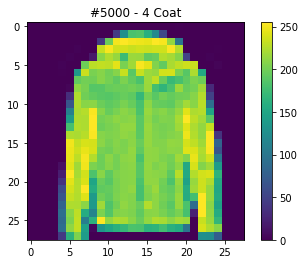

In [6]:
plt.figure()
idx_to_draw = 5000 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

### Data 전처리

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

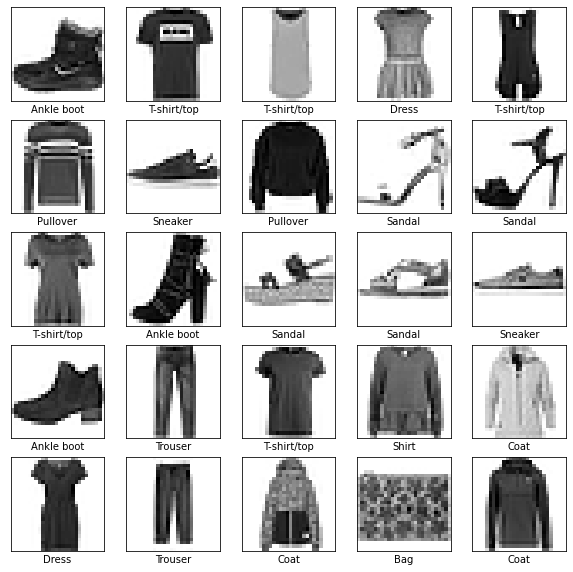

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### TDDO: 학습 코드를 위의 참조 url 을 이용하여 완성해보세요

## 층 설정

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #2차원 배열의 이미지를 1차원 배열로 변환
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #10개의 노드의 softmax층
])

In [12]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#fit(모델 훈련)
model.fit(train_images, train_labels, epochs=5)
#약 88%정도의 정확도를 달성

Epoch 1/5
1875/1875 [==============================] - 1s 408us/step - loss: 0.5055 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 1s 407us/step - loss: 0.3815 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 1s 409us/step - loss: 0.3409 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.3176 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 1s 433us/step - loss: 0.2968 - accuracy: 0.8915


In [14]:
#정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3556 - accuracy: 0.8718

테스트 정확도: 0.8718000054359436


In [17]:
#예측
predictions = model.predict(test_images) #새트에 있는 각 이미지의 레이블을 예측

In [18]:
predictions[0]

array([2.0831342e-06, 3.4285333e-07, 1.4635841e-06, 4.8517023e-08,
       3.6817983e-06, 1.6524164e-02, 1.8239507e-06, 2.2415871e-02,
       3.8934722e-05, 9.6101165e-01], dtype=float32)

In [20]:
np.argmax(predictions[0]) #이 모델은 이미지의 클래스가 9라고 확신

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

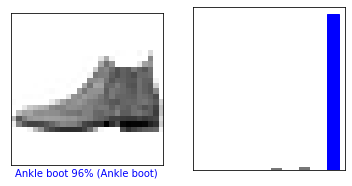

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show() #그래프로 확인

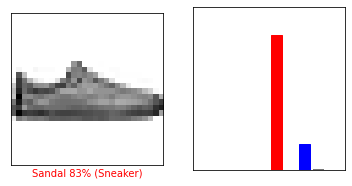

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

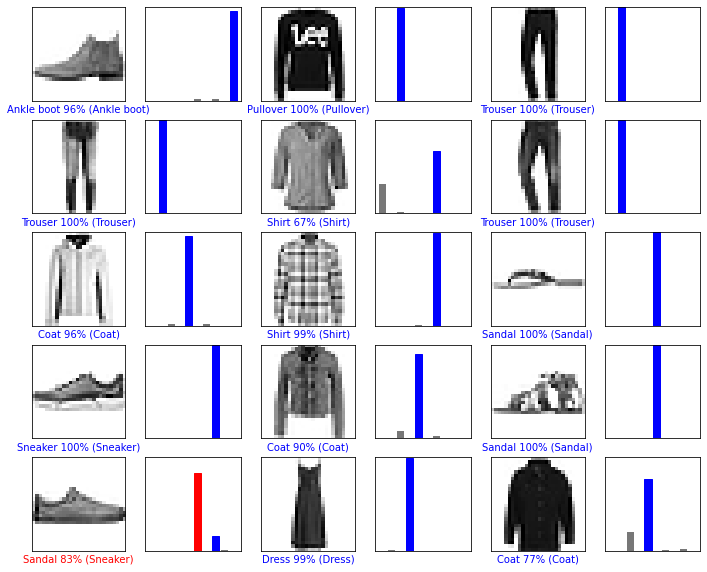

In [26]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [27]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[0]

print(img.shape)

(28, 28)


In [28]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0831303e-06 3.4285367e-07 1.4635813e-06 4.8517023e-08 3.6817876e-06
  1.6524147e-02 1.8239524e-06 2.2415854e-02 3.8934686e-05 9.6101165e-01]]


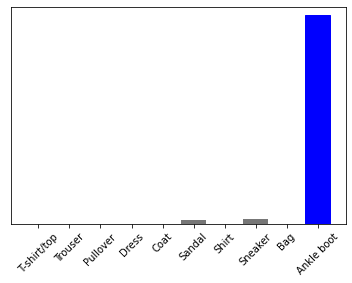

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0]) #이전과 마찬가지로 모델의 예측은 9

9